In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))
    return rmse

In [3]:
def r2(y, ypred):
    SS_resid = sum((y - ypred)**2)
    SS_tot = sum((y - np.mean(y))**2)
    R2 = 1- (SS_resid / SS_tot)
    return R2

# K32 - Phân tích dữ liệu thông minh

## Bài tập cá nhân 1

Họ tên học viên: Lê Nhựt Nam

MSHV: 22C11067

## Đề bài

Có số liệu thống kê về *lãi suất ngân hàng* ($X, \%$ năm) và *tổng vốn đầu tư* ($Y$, tỉ đồng) trên địa bàn tỉnh A qua 10 năm liên tiếp như sau:

| Năm  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|---|---|---|---|---|---|---|---|---|---|---|
| $X$  | 7.0  | 6.5  | 6.5  | 6.0  | 6.0  | 6.0  | 5.5  | 5.5  | 5.0  | 4.5  |
| $Y$  | 29  | 32  | 31  | 34  | 32  | 35  | 40  | 43  | 48  | 50  |

1. Hãy lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? Nêu ý nghĩa của các hệ số hồi quy ước lượng được? Đánh giá mức độ phù hợp của mô hình?
2. Kiểm định giả thiết "Hệ số hồi quy của X trong hàm hồi quy tổng thể bằng 0 với mức ý
nghĩa 2%" và nêu ý nghĩa của kết quả?
3. Dự báo tổng vốn đầu tư trung bình khi lãi suất là 4.8% năm với độ tin cậy 98%?

In [4]:
# Chuẩn bị dữ liệu
X_origin = np.array([7.0, 6.5, 6.5, 6.0, 6.0, 6.0, 5.5, 5.5, 5.0, 4.5])
y_origin = np.array([29, 32, 31, 34, 32, 35, 40, 43, 48, 50])
X = X_origin.reshape(-1,1) # 5x1 vector, N=5, D=1
y = y_origin.reshape(-1,1) # 5x1 vector

Text(0, 0.5, '$y$')

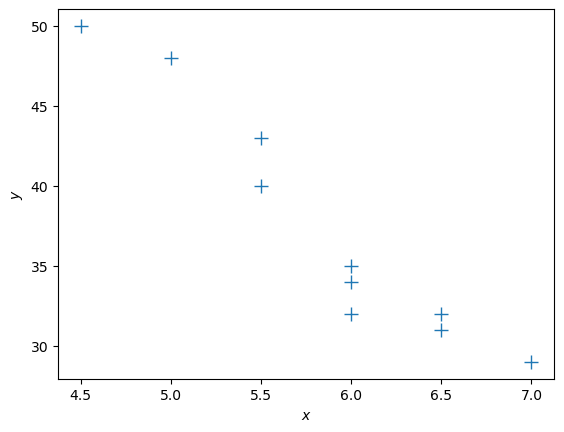

In [5]:
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")

### Hãy lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? Nêu ý nghĩa của các hệ số hồi quy ước lượng được? Đánh giá mức độ phù hợp của mô hình?

*Lời giải*

Dựa trên hình ảnh trực quan hóa, ta có thể sử dụng mô hình hồi để quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng. Xem xét dạng của bài toán hồi quy tuyến tính như sau:

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
trong đó $\boldsymbol x\in\mathbb{R}^D$ là biến phụ thuộc (đầu vào) và $y\in\mathbb{R}$ là các quan sát bị nhiễu. Vector tham số $\boldsymbol\theta\in\mathbb{R}^D$ tham số hóa hàm tuyến tính này.

Giả sử có tập huấn luyện $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. Ta hình thức hóa các bộ dữ liệu đầu vào huấn luyện theo thứ tự $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ và các mục tiêu huấn luyện tương ứng $\mathcal Y = \{y_1, \ldots, y_N\}$.

**Triển vọng cực đại**

Phương pháp ước tính triển vọng cực đại của các tham số $\boldsymbol\theta$. Trong ước tính triển vọng cực đại, các tham số $\boldsymbol\theta^{\mathrm{ML}}$ cực đại hóa likelihood

$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$

Giải bài toán tối ưu, nghiệm thu được là:

$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
trong đó:
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [6]:
def max_lik_estimate(X, y):
    """
        X: N x D ma trận dữ liệu huấn luyện đầu vào
        y: N x 1 vector của mục tiêu huấn luyện/ quan sát huấn luyện
        trả về: tham số triển vọng cực đại (D x 1)
    """
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    # theta_ml = np.linalg.pinv(X) @ y
    
    return theta_ml

In [7]:
def predict_with_estimate(Xtest, theta):
    """
        Xtest: K x D ma trận dữ liệu kiểm tra
        theta: D x 1 vector tham số
        trả về: kết quả dự đoán f(Xtest); K x 1 vector
    """
    prediction = Xtest @ theta
    
    return prediction 

Text(0, 0.5, '$y$')

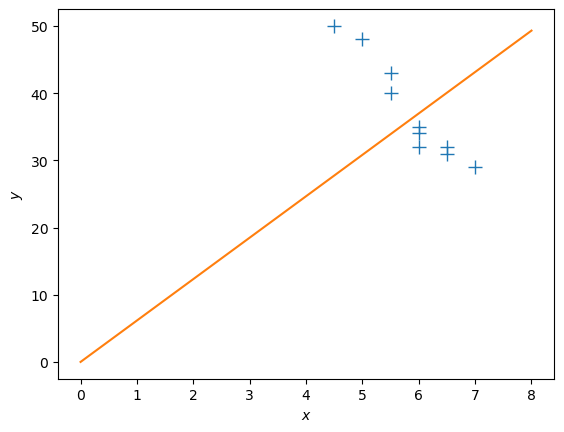

In [8]:
# Tính toán ước lượng triển vọng cực đại
theta_ml = max_lik_estimate(X,y)

Xtest = np.linspace(0,8,40).reshape(-1,1)

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# Trực quan
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [9]:
# Đánh giá RMSE
RMSE(y, X @ theta_ml)

11.383352122444272

In [10]:
# Đánh giá R2
r2(y, X @ theta_ml)

array([-1.61040906])

Nhận xét:

- Đường hồi quy không tốt

Cách giải quyết: thêm một bias vào mô hình để nó linh hoạt hơn.

$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$

Định nghĩa:

$$\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$$

Ta viết lại phương trình mô hình hồi quy tuyến tính:

$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

Text(0, 0.5, '$y$')

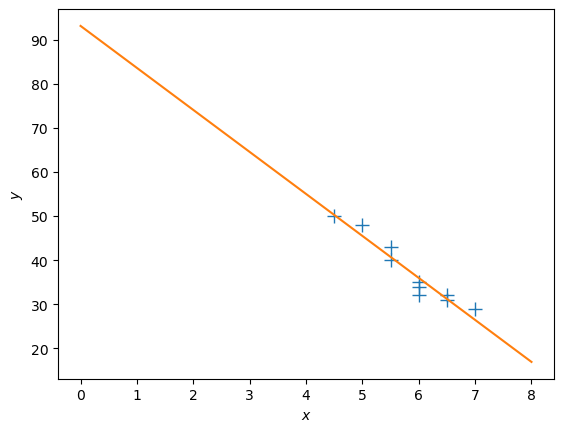

In [11]:
X_aug = np.hstack([np.ones((len(X),1)), X])

# Tính toán ước lượng triển vọng cực đại
theta_ml = max_lik_estimate(X_aug, y)

Xtest = np.linspace(0,8,40).reshape(-1,1)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

# dự đoán các giá trị hàm tại các điểm kiểm tra bằng bộ ước lượng triển vọng cực đại
ml_prediction = predict_with_estimate(Xtest_aug, theta_ml)

# Trực quan
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [12]:
# Đánh giá RMSE
RMSE(y, X_aug @ theta_ml)

1.9950186722152672

In [13]:
# Đánh giá R2
r2(y, X_aug @ theta_ml)

array([0.91982072])

Nhận xét:

- Mô hình cải thiện RMSE thấp hơn so với phiên bản trước.

- Các hệ số của mô hình: hệ số góc $\theta_0$ và hệ số bias $\theta_1$ tạo thành vector tham số của mô hình

**Phi tuyến hóa hồi quy tuyến tính**

Ta hoàn toàn có thể khớp các hàm phi tuyến tính trong đầu vào $\boldsymbol x$, miễn là các tham số $\boldsymbol\theta$ xuất hiện tuyến tính. Điều này có nghĩa là, chúng ta có thể học các hàm có dạng:

$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
trong đó các đặc trưng $\phi_k(\boldsymbol x)$ là các phép biến đổi (có thể phi tuyến tính) của các đầu vào $\boldsymbol x$.

Một trong những loại hàm thường hay sử dụng đó là hàm đa thức bậc $K$, ta viết

$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Ở đây, $\boldsymbol\phi(x)$ là phép biến đổi đặc trưng phi tuyến tính của các đầu vào $x\in\mathbb{R}$.

Từ đó, tập huấn luyện sau khi biến đổi có dạng:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

In [14]:
def poly_features(X, K):
    # X: đầu vào có kích thước N x 1
    # K: bậc của đa thức
    # tính toán ma trận đặc trưng Phi (N x (K+1))
    
    X = X.flatten()
    
    #initialize Phi
    Phi = np.zeros((X.shape[0], K+1))
    
    for k in range(K+1):
        Phi[:,k] = X**k
    return Phi

Nghiệm tối ưu

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

Nghiệm tối ưu (+tối ưu tính toán số học)

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [15]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: ma trận đặc trưng cho dữ liệu đầu vào. Kích thước N x D
    # y: các mục tiêu huấn luyện. Kích thước N x 1
    # trả về: bộ ước lượng triển vọng cực đại theta_ml. Kích thước D x 1
    
    kappa = 1e-08 # 'jitter' term; nhằm mục tiêu tối ưu tính toán số học
    
    # ước lượng triển vọng cực đại
    theta_ml = np.linalg.inv(Phi.T @ Phi + kappa*np.eye(Phi.shape[1])) @ Phi.T @ y
    
    return theta_ml

Text(0, 0.5, '$y$')

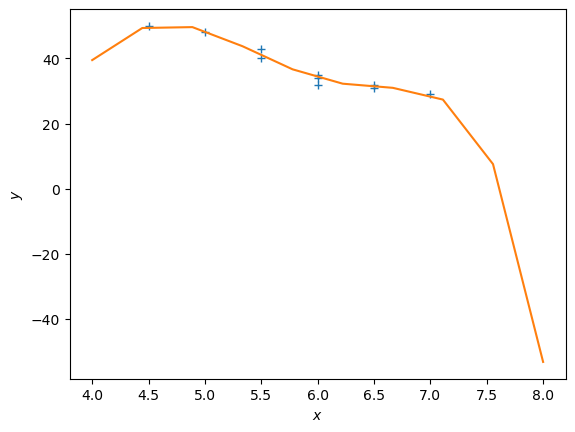

In [16]:
K = 5 # Định nghĩa bậc đa thức mà ta muốn khớp
# Ở đây, em đã chạy tay và chọn bậc K = 5, ta có thể code vòng lặp để dò ra số K này

Phi = poly_features(X, K) # N x (K+1) ma trận đặc trưng

poly_theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # bộ ước lượng triển vọng cực đại

# dữ liệu test
Xtest = np.linspace(4,8,10).reshape(-1,1)

# ma trận đặc trưng cho dữ liệu test
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ poly_theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$")

In [17]:
# Đánh giá RMSE
RMSE(y, poly_features(X, K) @ poly_theta_ml)

1.0451326944171508

**Giải thích hệ số của mô hình hồi quy tuyến tính**

In [18]:
beta_0, beta_1 = theta_ml[0], theta_ml[1]
beta_0, beta_1

(array([93.1641791]), array([-9.53233831]))

Hệ số ```beta_1``` trong mô hình hồi quy thể hiện thay đổi trong *lãi suất ngân hàng* cho một đơn vị thay đổi trong *tổng vốn đầu tư*. Hệ số ```beta_0``` là dự đoán *tổng vốn đầu tư* nếu *lãi suất ngân hàng* bằng 0

In [19]:
from scipy.stats import pearsonr


covariance = beta_1 * np.var(X_origin) 
cor = covariance / (np.std(X_origin) * np.std(y_origin))
print(cor)
print(pearsonr(X_origin, y_origin)[0])

[-0.95907284]
-0.9590728434941582


**Cực đại xác suất hậu nghiệm**

Thay vì cực đại triển vọng, chúng ta có thể xem xét việc cực đại phân phối hậu nghiệm trên các tham số $\boldsymbol\theta$, 

$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{\overbrace{p(\mathcal Y|\mathcal X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(\mathcal Y|\mathcal X)}_{\text{evidence}}}
$$

Mục đích của tham số tiên nghiệm $p(\boldsymbol\theta)$ là ngăn chặn các tham số đạt được các giá trị cực trị, một dấu hiệu cho thấy mô hình quá khớp (overfitting). Tham số tiên nghiệm cho phép chỉ định phạm vi giá trị tham số "có khả năng suy diễn". Thông thường là phân phối tiên nghiệm Gaussian $\mathcal N(\boldsymbol 0, \alpha^2\boldsymbol I)$, có tâm tại $\boldsymbol 0$ với phương sai $\alpha^2$ dọc theo mỗi chiều tham số.

Nghiệm của bài toán tối ưu xác suất hậu nghiệm trên là:

$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^2}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
trong đó $\sigma^2$ là phương sai của nhiễu.

In [20]:
def map_estimate_poly(X, y, sigma, alpha):
    # X: đầu vào có kích thước N x D
    # y: các mục tiêu huấn luyện. Kích thước D x 1
    # sigma: standard deviation của nhiễu
    # alpha: standard deviation phân phối tiên nghiệm trên các tham số
    # trả về: bộ ước lượng cực đại xác suất hậu nghiệm theta_map. Kích thước D x 1
    
    theta_map = np.linalg.inv(X.T @ X + (sigma/alpha)**2 * np.eye(X.shape[1])) @ X.T @ y
    
    return theta_map

In [21]:
sigma = 1.0 # standard deviation của nhiễu
alpha = 100 # standard deviation phân phối tiên nghiệm trên các tham số

#cực đại xác suất hậu nghiệm
theta_map = map_estimate_poly(X_aug, y, sigma, alpha)

# bộ ước lượng triển vọng cực đại
theta_ml = max_lik_estimate(X_aug, y)

In [22]:
theta_map

array([[93.09873526],
       [-9.52131047]])

In [23]:
theta_ml

array([[93.1641791 ],
       [-9.53233831]])

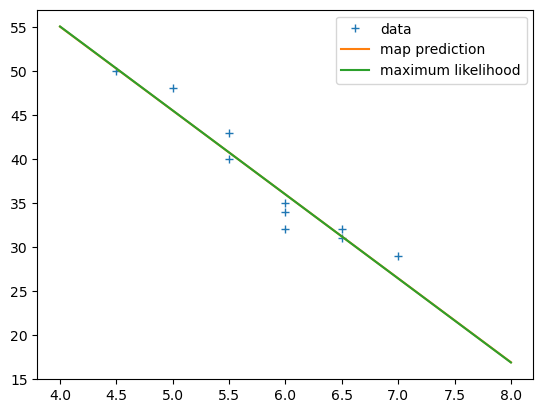

In [24]:
Xtest = np.linspace(4,8,10).reshape(-1,1)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

map_prediction = Xtest_aug @ theta_map

ml_prediction = Xtest_aug @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, map_prediction)
plt.plot(Xtest, ml_prediction)

plt.legend(["data", "map prediction", "maximum likelihood"])

**Hồi quy tuyến tính Bayesian**

\begin{align}
&\text{Maximum likelihood: }E[f(\boldsymbol X_{\text{test}})] = \boldsymbol X_{\text{test}}\boldsymbol \theta_{ml}\\
&\text{Maximum a posteriori: } E[f(\boldsymbol X_{\text{test}})] = \boldsymbol X_{\text{test}}\boldsymbol \theta_{map}\\
&\text{Bayesian: } p(f(\boldsymbol X_{\text{test}})) = \mathcal N(f(\boldsymbol X_{\text{test}}) \,|\, \boldsymbol X_{\text{test}} \boldsymbol\theta_{\text{mean}},\, \boldsymbol X_{\text{test}} \boldsymbol\theta_{\text{var}}  \boldsymbol X_{\text{test}}^\top)
\end{align}

In [25]:
prior_var, noise_var = 100, 1

# Tính toán bộ ước lượng triển vọng cực đại
theta_ml = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y


# Tính toán bộ ước lượng cực đại xác suất hậu nghiệm
theta_map = np.linalg.inv(X_aug.T @ X_aug + (noise_var/prior_var)**2 * np.eye(X_aug.shape[1])) @ X_aug.T @ y

# Tham số hậu nghiệm
iSN = (2/prior_var + (X_aug.T @ X_aug)/noise_var) # posterior precision - độ chính xác hậu nghiệm 
theta_var = np.linalg.pinv(noise_var*2/prior_var + (X_aug.T @ X_aug))*noise_var  # posterior covariance - hiệp phương sai hậu nghiệm
theta_mean= np.linalg.solve(iSN, (X_aug.T @ y)/noise_var) # posterior mean - trung bình hậu nghiệm


# các dự đoán ước lượng triển vọng cực đại (just the mean)
m_mle_test = Xtest_aug @ theta_ml

# các dự đoán ước lượng cực đại xác suất hậu nghiệm (just the mean)
m_map_test = Xtest_aug @ theta_map

# phân phối dự đoán (Bayesian linear regression)
# mean prediction, trung bình
mean_blr = Xtest_aug @ theta_mean
# variance prediction, phương sai
cov_blr =  Xtest_aug @ theta_var @ Xtest_aug.T

Text(0, 0.5, '$y$')

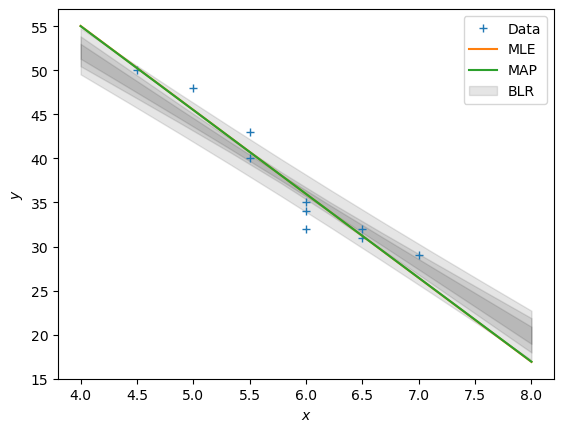

In [26]:
plt.figure()
plt.plot(X, y, "+")
plt.plot(Xtest, m_mle_test)
plt.plot(Xtest, m_map_test)
var_blr = np.diag(cov_blr)

conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()

plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound1, 
                 mean_blr.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound2, 
                 mean_blr.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound3, 
                 mean_blr.flatten() - conf_bound3, alpha = 0.1, color="k")

plt.legend(["Data", "MLE", "MAP", "BLR"])
plt.xlabel('$x$')
plt.ylabel('$y$')

### Kiểm định giả thiết "Hệ số hồi quy của X trong hàm hồi quy tổng thể bằng 0 với mức ý nghĩa 2%" và nêu ý nghĩa của kết quả?

#### Sử dụng statmodels

In [27]:
import statsmodels.api as sm
results = sm.OLS(y, X_aug).fit()
r = np.zeros_like(results.params)

In [28]:
results.summary()

/home/lnhutnam/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.78
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.17e-05
Time:                        19:53:41   Log-Likelihood:                -21.096
No. Observations:                  10   AIC:                             46.19
Df Residuals:                       8   BIC:                             46.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1642      5.863     15.889      0.000      79.643     106.685
x1            -9.5323      0.995     -9.580      0.000     -11.827      -7.238
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.366
Skew:                          -0.341   Prob(JB):                        0.833
Kurtosis:                       2.357   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
results.params

array([93.1641791 , -9.53233831])

Với một hệ số hồi quy tuyến tính đơn, ta muốn kiểm tra liệu có tồn tại một mối quan hệ nào giữa biến phụ thuộc $y$ (tổng vốn đầu tư) và biến độc lập $x_i$ (lãi suất ngân hàng) hay không
- Không có quan hệ: Không tồn tại quan hệ giữa biến phụ thuộc $y$ (tổng vốn đầu tư) và biến độc lập $x_i$ (lãi suất ngân hàng). Trong tình huống này, hệ số hồi quy $\beta_i$ bằng không. Điều này cho ta giả thiết rỗng/ không (null hypothesis) trong kiểm định hệ số hồi quy:

$$
H_0: \beta_i = 0
$$

- Có tồn tại quan hệ: Có tồn tại quan hệ giữa biến phụ thuộc $y$ (tổng vốn đầu tư) và biến độc lập $x_i$ (lãi suất ngân hàng). Trong tình huống này, hệ số hồi quy $\beta_i$ không bằng không. Điều này cho ta giả thiết thay thế (alternative hypothesis) trong kiểm định hệ số hồi quy:

$$
H_1: \beta_i \ne 0
$$

Lưu ý: Ở ta không phải lo lắng về hệ số hồi quy $\beta_i$ có giá trị âm hay dương, chỉ cần nó khác không, nó cho ta ý nghĩa về mối quan hệ giữa biến phụ thuộc và độc lập.

In [30]:
# Tính toán giá trị p-value cho hệ số của X
p_value = results.pvalues[1]

# Đặt mức ý nghĩa 2%
alpha = 0.02

# So sánh p-value với mức ý nghĩa
if p_value > alpha:
    print("The regression coefficient of X is not statistically significant.")
else:
    print("The regression coefficient of X is statistically significant.")

The regression coefficient of X is statistically significant.


#### Không sử dụng statmodels

In [31]:
# Tính SSE
sse = np.sum((X_aug @ theta_ml - y) ** 2, axis=0) / float(X_aug.shape[0] - X_aug.shape[1])

In [32]:
# Tính SE
se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X_aug.T, X_aug))))
                                                    for i in range(sse.shape[0])
                    ])

In [33]:
# Tính t-statistics
t = (theta_ml[0] - theta_ml[1]) / se

In [34]:
# Tính p-value
from scipy import stats

p_val = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X_aug.shape[1]))

In [35]:
# So sánh p-value với mức ý nghĩa
if p_value > alpha:
    print("The regression coefficient of X is not statistically significant.")
else:
    print("The regression coefficient of X is statistically significant.")

The regression coefficient of X is statistically significant.


### Dự báo tổng vốn đầu tư trung bình khi lãi suất là 4.8% năm với độ tin cậy 98%?

In [36]:
# Khớp mô hình hồi quy tuyến tính
results = sm.OLS(y, X_aug).fit()

# Các hệ số của mô hình hồi quy tuyến tính, beta0 và beta1
b0 = results.params[0]
b1 = results.params[1]
print("Coefficients of the linear model: beta_0 = {}, beta_1 = {}".format(b0, b1))

# Tính toán các giá trị khớp của y
y_fitted = results.get_prediction(X_aug).predicted_mean

# Giá trị lãi suất đầu vào
inp_val = 4.8

print("==========================================================")
# Dự đoán tổng vốn đầu tư với giá lãi suất đầu vào
y_pred = b1 * inp_val + b0
print("Predicted value for input {}: {}".format(inp_val, y_pred))

# Tính MSE
mse = np.mean((y-y_fitted)**2)

# Tính t-statistics với độ tin cậy 98%
t_val = np.array([stats.t.ppf(0.98, X_aug.shape[0] - 2)])

# Độ lỗi chuẩn của trung bình ước lượng
err_mean_estimate = ((1 / X_aug.shape[0]) + (inp_val - np.mean(X_aug))**2 / (np.sum((X_aug - np.mean(X_aug))**2)))
print("Standard error of the mean estimate: ", err_mean_estimate)

# Độ lỗi chuẩn của dự đoán
err_pred = (1 + (1 / X_aug.shape[0]) + (inp_val - np.mean(X_aug))**2 / (np.sum((X_aug - np.mean(X_aug))**2)))
print("Standard error of the prediction: ", err_pred)

print("==========================================================")
# Giới hạn chặn trên và chặn dưới cho ước lượng trung bình ở độ tin cậy 98%
mean_est_upper = y_pred + t_val * np.sqrt(mse * err_mean_estimate)
mean_est_lower = y_pred - t_val * np.sqrt(mse * err_mean_estimate)
print("Upper bound mean estimate at 98% confidence: ", mean_est_upper)
print("Lower bound mean estimate at 98% confidence: ", mean_est_lower)

print("==========================================================")
# Giới hạn chặn trên và chặn dưới cho dự đoán ở độ tin cậy 98%
pred_upper = y_pred + t_val * np.sqrt(mse * err_pred)
pred_lower = y_pred - t_val * np.sqrt(mse * err_pred)
print("Upper bound prediction at 98% confidence: ", pred_upper)
print("Lower bound prediction at 98% confidence: ", pred_lower)

print("==========================================================")
# Giới hạn chặn trên và chặn dưới cho hệ số hồi quy của X ở độ tin cậy 98%
b1_upper = b1 + t_val * np.sqrt(mse) / np.sqrt(np.sum((X_aug - np.mean(X_aug))**2))
b1_lower = b1 - t_val * np.sqrt(mse) / np.sqrt(np.sum((X_aug - np.mean(X_aug))**2))
print("Upper bound Beta 1 at 98% confidence: ", b1_upper)
print("Lower bound Beta 1 at 98% confidence: ", b1_lower)

Coefficients of the linear model: beta_0 = 93.16417910447775, beta_1 = -9.532338308457732
Predicted value for input 4.8: 47.408955223880646
Standard error of the mean estimate:  0.1154163693813067
Standard error of the prediction:  1.1154163693813068
Upper bound mean estimate at 98% confidence:  [55.53101256]
Lower bound mean estimate at 98% confidence:  [39.28689789]
Upper bound prediction at 98% confidence:  [72.65834308]
Lower bound prediction at 98% confidence:  [22.15956737]
Upper bound Beta 1 at 98% confidence:  [-7.37349708]
Lower bound Beta 1 at 98% confidence:  [-11.69117953]


Vậy giá trị dự báo tổng vốn đầu tư trung bình khi lãi suất là 4.8% năm với độ tin cậy 98% là 47.41, với chặn trên trung bình ước lượng 55.53 và chặn dưới 39.27

### Tài liệu tham khảo

[1] https://colab.research.google.com/github/mml-book/mml-book.github.io/blob/master/tutorials/tutorial_linear_regression.solution.ipynb